### Feature Description

PassengerId: unique id number to each passenger

Survived: Binary categorical feature survived(1) or died(0)

Pclass: Ordinal feature with 3 values showing classes of passenger onboard (1,2,3)
Name: Unique values names of passengers

Sex: gender of passenger Binary Categorical feature

Age: age of passenger continuous numerical value

SibSp: number of siblings/spouses

Parch: number of parents/childrens

Ticket: ticket number

Fare: amount of money spent on ticket continuous numerical

Cabin: cabin category 

Embarked: port where passenger embarked(C=Cherbourg, Q=Queenstown, S=Southampton)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/hp/Documents/titanic_train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
x=df.Age.sort_values()

In [5]:
x[500]

17.0

In [51]:
df.Sex.dtype

dtype('O')

In [52]:
a= 'name'

In [27]:
df.info()   # dtype is numpy parameter to check datatype. but type(a) is inbuilt method to check datatype of an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 Categorical Variable: (Survived, Sex, Pclass, Embarked, Cabin, Ticket, SibSp and Parch)
Numerical Variable: (Age, PassengerId and Fare)

In [28]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### NA values: Age- ,Cabin- ,Embarked-

In [29]:
df['Embarked'].nunique()
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df['Age'].isna().sum()

177

In [31]:
#df[df['Cabin'].isna()]
df['Cabin'].value_counts()
#df['Cabin'].nunique()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

#### Dealing with NA values

In [32]:
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

In [33]:
df['Embarked'].isna().sum()

0

In [34]:
# Dealing with NA valu
df['Age'].fillna(df['Age'].mean(),inplace= True)

In [35]:
df['Age'].isna().sum()

0

In [36]:
df['Cabin']= df['Cabin'].fillna(df['Cabin'].mode()[0])

In [37]:
df['Cabin'].isna().sum()

0

### Dealing with Skewness 

In [38]:
# Checking if the numerical features are skewed. it's a measure of 
# how a feature deviates from uniform normal distribution

from scipy.stats import skew

In [12]:
# Measure of skewness : general -3 <skew< 3 but more than 0.5 is considered skewd 
print(df.Age.skew())
print(df.Fare.skew())  # seems to be higly skewd (4.787)

0.4344880940129925
4.787316519674893


<AxesSubplot:xlabel='Fare', ylabel='Density'>

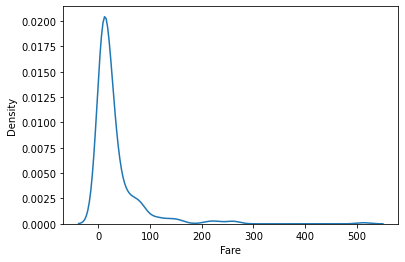

In [13]:
sns.kdeplot(df.Fare)  # can also been from graph

In [308]:
# Removing skewness applying log trnsformation on Fare
# df['Fare']=np.log(df['Fare']+1)
# Is'nt usefull for algorithm accuracy

In [309]:
# sns.kdeplot(df.Fare)  distribution has chnged much good

### Dealing with Outliers

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

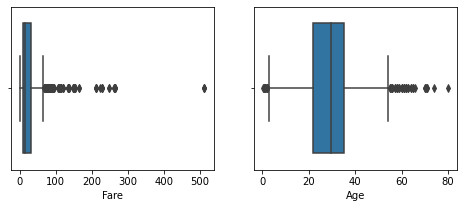

In [14]:
# lets deal with outliers
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.boxplot(df['Fare'])

plt.subplot(1,2,2)
sns.boxplot(df['Age'])

In [9]:
# Eliminating OUtliers 
# standrd way definition of OUlier: x< q1-1.5IQR & x> q3+1.5IQR

q1_fare= df['Fare'].quantile(0.25)
q3_fare= df['Fare'].quantile(0.75)

iqr_fare= q3_fare - q1_fare
iqr_fare

#df= df[(df.Fare> (q1_fare + 1.5*iqr_fare) & df.Fare< (q3_fare + 1.5*iqr_fare)) ]
df = df[~((df.Fare<(q1_fare-1.5*iqr_fare))|(df.Fare>(q3_fare+1.5*iqr_fare)))]

In [10]:
q1_age= df['Age'].quantile(0.25)
q3_age= df['Age'].quantile(0.75)

iqr_age= q3_age - q1_age
iqr_age

#df= df[df.Age< ((q1_age + 1.5*iqr_age))]
df = df[~((df.Age<(q1_age-1.5*iqr_age))|(df.Age>(q3_age+1.5*iqr_age)))]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

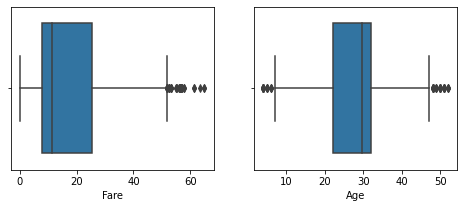

In [11]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.boxplot(df['Fare'])

plt.subplot(1,2,2)
sns.boxplot(df['Age'])

#### Data Visualisations

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Correlation between categorical feature (Cramer's V rule)

In [32]:
# for nomianal features ['Embarked','Cabin'] : Cramer's V rule is used
#df.groupby('Embarked')['Cabin','Sex'].value_counts()

In [33]:
ob=df.groupby('Cabin')

In [39]:
df.Cabin.value_counts()

B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

In [21]:
df.groupby('Embarked')['Cabin'].value_counts()

Embarked  Cabin          
C         B96 B98            99
          B18                 2
          B35                 2
          B49                 2
          B57 B59 B63 B66     2
                             ..
S         E63                 1
          E68                 1
          E77                 1
          F G63               1
          T                   1
Name: Cabin, Length: 152, dtype: int64

In [25]:
df.loc[df.Embarked=='Q',['Embarked','Cabin']]

,Embarked,Cabin
5,Q,B96 B98
16,Q,B96 B98
22,Q,B96 B98
28,Q,B96 B98
32,Q,B96 B98
...,...,...
790,Q,B96 B98
825,Q,B96 B98
828,Q,B96 B98
885,Q,B96 B98


In [9]:
ob= df.groupby('Embarked')

In [16]:
df2=pd.DataFrame(ob['Cabin'].value_counts())

In [17]:
df2.head()

Cabin
Embarked Cabin                 
C        B96 B98             99
         B18                  2
         B35                  2
         B49                  2
         B57 B59 B63 B66      2

In [15]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
df.loc[:,['Cabin','Embarked']]

,Cabin,Embarked
0,B96 B98,S
1,C85,C
2,B96 B98,S
3,C123,S
4,B96 B98,S
...,...,...
886,B96 B98,S
887,B42,S
888,B96 B98,S
889,C148,C


#### Contunuos num features correlation( Pearson's correlation)

In [20]:
cr= df.corr()
cr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.040845,-0.055826,0.032200,-0.075397,-0.016902,0.019817
Survived,-0.040845,1.000000,-0.272344,-0.051328,-0.014041,0.062613,0.253976
Pclass,-0.055826,-0.272344,1.000000,-0.282037,0.085489,0.065637,-0.585988
Age,0.032200,-0.051328,-0.282037,1.000000,-0.288715,-0.119615,0.078388
SibSp,-0.075397,-0.014041,0.085489,-0.288715,1.000000,0.385584,0.368823
Parch,-0.016902,0.062613,0.065637,-0.119615,0.385584,1.000000,0.341659
Fare,0.019817,0.253976,-0.585988,0.078388,0.368823,0.341659,1.000000


<AxesSubplot:>

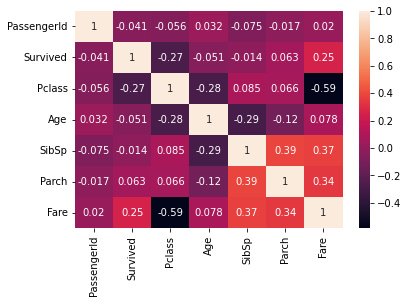

In [21]:
sns.heatmap(cr,annot=True)

### Univariate Analysis

In [14]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Parch', ylabel='count'>

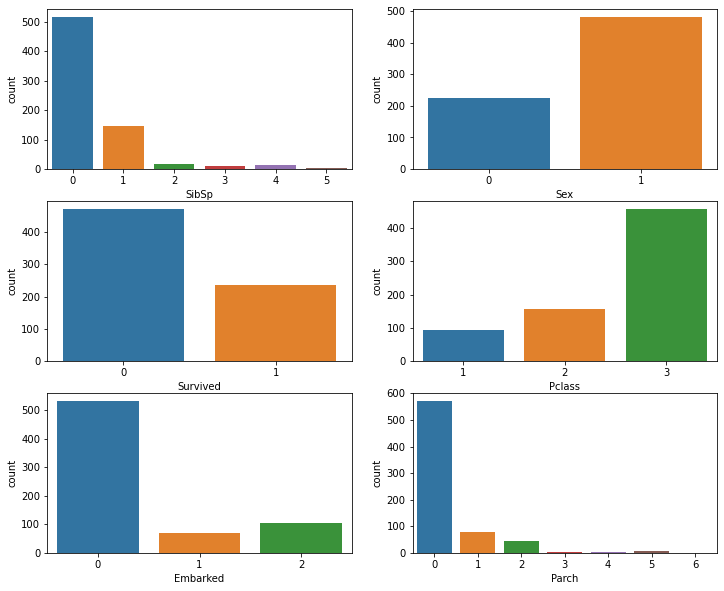

In [67]:

plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
sns.countplot(df.SibSp)
plt.subplot(3,2,2)
sns.countplot(df.Sex)
plt.subplot(3,2,3)
sns.countplot(df.Survived)
plt.subplot(3,2,4)
sns.countplot(df.Pclass)
plt.subplot(3,2,5)
sns.countplot(df.Embarked)
plt.subplot(3,2,6)
sns.countplot(df.Parch)

# the plot shows count/population of passengers w.r.t different features

<AxesSubplot:xlabel='Sex', ylabel='Age'>

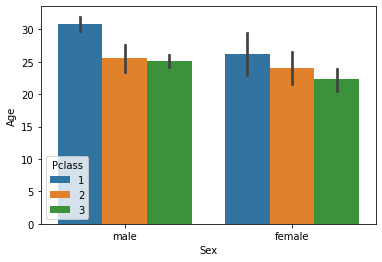

In [25]:
# let's more information about passengrs
#plt.bar(x='Sex', height='Age',data=df)
sns.barplot(x='Sex', y='Age', data= df,hue= 'Pclass')

# 1) 1st class passengers were majorly of age around 40 'old people'
# 2) Most of the 3rd class passengers were young people male==25, female==20
# 3) people of age around 30 were 2nd class passeng.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

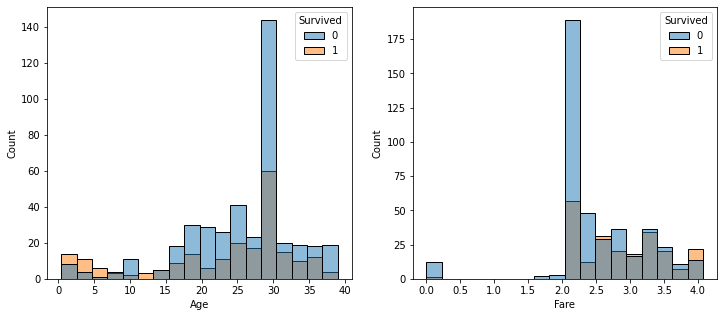

In [26]:
# Let's Understand Survival now
# Checking survival
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x='Age',hue='Survived',data=df)
plt.subplot(1,2,2)
sns.histplot(x='Fare',hue='Survived',data=df)


In [27]:
# Most of the people of age(28-40) who did'nt survive 
# people survied actually payed high Fare

<AxesSubplot:xlabel='Embarked', ylabel='count'>

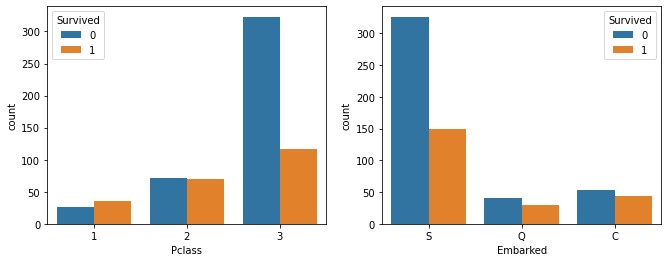

In [28]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.countplot(x='Pclass',hue='Survived',data= df)
plt.subplot(1,2,2)
sns.countplot(x=('Embarked'),hue=('Survived'),data= df)

In [23]:
# 3rd class passengers died more especially male passng.
# there must be some reason people who boarded from Southhampton died more while people from Queensland survived much

### Feature Transformation

In [15]:
# to understand survivl better we transform some features

In [1]:
#(creating a child column) - defin fn. to filter child outof 'age','Sex' -> apply fn.-> add it naming new colm.

def child(passenger):
    Age,Sex= passenger
    
    if Age<16:
        return 'child'
    else:
        return Sex


In [223]:
df['person']= df[['Age','Sex']].apply(child,axis=1)
df['person'].value_counts()

male      462
female    197
child      49
Name: person, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


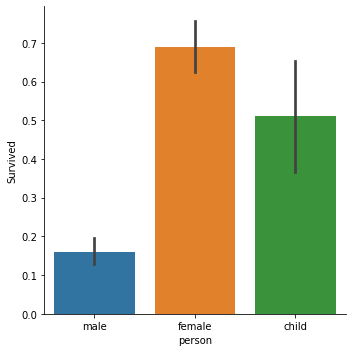

In [224]:
sns.factorplot(data=df,x='person',y='Survived',kind='bar')
# More probability children were in 3rd class

In [225]:
# making family size column to know relation between count of family members and survival
df["Fsize"]= df["SibSp"]+ df["Parch"]

In [226]:
df.Fsize.value_counts()   # 0 : means alone , otherwise no of companions

0    470
1    115
2     67
3     17
5     14
6     10
4     10
7      5
Name: Fsize, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


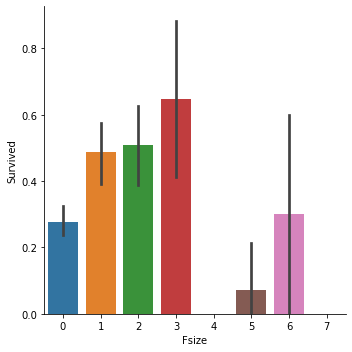

In [227]:
sns.factorplot(data=df,x='Fsize',y='Survived',kind='bar')
# probability of survival for family size more 3 was very less
# i.e big family did'nt survive

In [228]:
# Dropping newly added feature since not usefull in model building 
df= df.drop(columns=['Fsize','person'])

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
# NAME CORRECTION 
#name=train_df["Name"]
#train_df["Title"]=[i.split(".")[0].split(",")[-1].strip() for i in name]

In [194]:
#df.Name.head()

In [183]:

#df['Name'].str[:7] # but we need separator
#a=df['Name'].str.split(',')
#a

In [ ]:
#name=df["Name"] # making colm. as sereis
#df["Title"]=[i.split(".")[0].split(",")[-1].strip() for i in name]

In [184]:
#df.Name.str.split(".")[0]
#df['Name'].str[0]

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ML algo. 

In [22]:
df['Survived'].value_counts() # which gives us ratio(60:40)

# Since the dataset is not imbalanced much we now proceed to further feature engineering

0    473
1    235
Name: Survived, dtype: int64

In [39]:
# dropping unnecessary colms. 'Cabin' & 'Ticket'

df=df.drop(columns=['Cabin','Ticket','Name','PassengerId'])

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
# MANUAL encoding daataset 

In [42]:
l=['Sex','Embarked']

In [15]:
# Defining the map function
def binary_map(x):
    return x.map({"C":2,'Q': 1, "S": 0,'male': 1,'female': 0})


In [16]:
df[l]= df[l].apply(binary_map)

LABEL ENCODING

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

In [47]:
# Since labelencoder fits single feature at a time we r gonna use for loop

for i in l:
    df[i]= labelencoder.fit_transform(df[i].astype(str))  # to consider each feature datatype as string 

In [48]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
#pip install category_encoders

In [23]:
# Target encoding method
from category_encoders import TargetEncoder

In [29]:
enc= TargetEncoder()

C:\Users\hp\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\hp\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [27]:
l

['Sex', 'Embarked']

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,0
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,0
5,0,3,1,29.699118,0,0,8.4583,1


In [30]:
# can use label encoder


#### Dividing dataset into x,y

In [18]:
x=df.iloc[:,1:]


In [19]:
x.shape

(708, 7)

In [20]:
y=df['Survived']

In [21]:
y.shape

(708,)

In [22]:
# Splitting dataset into traintest_split
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.33,random_state=42)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(474, 7)
(234, 7)
(474,)
(234,)


#### Standardizing features to Standard Scaler

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler= StandardScaler()
# scaling done to list of features

In [27]:
# we'll scale only 'fare' & 'age'

v=['Fare','Age']
x_train[v]= scaler.fit_transform(x_train[v])
x_test[v]= scaler.transform(x_test[v])

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [28]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
99,2,1,0.550284,1,0,0.680400,0
30,1,1,1.178097,0,0,0.810185,2
21,2,1,0.550284,0,0,-0.300074,0
746,3,1,-1.333155,1,1,0.246729,0
532,3,1,-1.228519,1,1,-0.735314,2


In [29]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
147,3,0,-2.065603,2,2,1.312052,0
313,3,1,-0.077529,0,0,-0.685038,0
417,2,0,-1.123884,0,2,-0.300074,0
251,3,0,0.027106,1,1,-0.491455,0
766,1,1,0.100259,0,0,1.706127,2


In [69]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_curve, auc

In [70]:
svcT = svm.SVC(kernel = 'linear', C =0.1, gamma = 'scale', probability =True). fit(x_train, y_train)

In [71]:
print(svcT)

SVC(C=0.1, kernel='linear', probability=True)


In [72]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [73]:
# Accuracy of model
train_score= svcT.score(x_train,y_train)

In [74]:
print(train_score)

0.7932489451476793


In [75]:
y_pred = svcT.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [78]:
confusion_matrix

array([[129,  21],
       [ 32,  52]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
print(accuracy_score(y_test,y_pred))   # test accuracy score

0.7735042735042735


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       150
           1       0.71      0.62      0.66        84

    accuracy                           0.77       234
   macro avg       0.76      0.74      0.75       234
weighted avg       0.77      0.77      0.77       234



In [60]:
# now finding best value of "C" & best kernel to use 
# applying GridSearchCV
from sklearn.model_selection import GridSearchCV

In [82]:
svmtry = SVC()  # creating a pseudo model
param_grid = {'C': [0.01,0.05,0.1,1], 'kernel': ['linear','rbf'], 'gamma': ['scale','auto']}

In [83]:
grid = GridSearchCV(svmtry, param_grid)   # making a gridmodel

In [84]:
grid.fit(x,y)    # fitting gridmodel to data

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [85]:
grid.best_params_ # suggested c:0.1 , kernel: linear & gamma : scale

{'C': 0.05, 'gamma': 'scale', 'kernel': 'linear'}

In [86]:
# applying for suggested 
svct2 = svm.SVC(C= 0.05, kernel='linear', gamma='scale', probability= True)

In [88]:
svct2.fit(x_train,y_train)

SVC(C=0.05, kernel='linear', probability=True)

In [89]:
y_predcv= svct2.predict(x_test)

In [91]:
print(classification_report(y_test,y_predcv))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       150
           1       0.71      0.62      0.66        84

    accuracy                           0.77       234
   macro avg       0.76      0.74      0.75       234
weighted avg       0.77      0.77      0.77       234



#### KNN

In [92]:
# Applying KNN 
from sklearn.neighbors import KNeighborsClassifier

In [93]:
# choosing approprinate no of neighbours
import math
math.sqrt(len(y_test))

15.297058540778355

In [94]:
knn= KNeighborsClassifier(n_neighbors=15)
knn
kmod= knn.fit(x_train, y_train)
kmod

KNeighborsClassifier(n_neighbors=15)

In [95]:
# score gives mean accuracy for a given test data 
#printing accuracy  For different values of k acc. was fluctuating betwn 79,80
train_accu= kmod.score(x_train,y_train)
train_accu

0.8016877637130801

In [96]:

# it'll predict on test data what it has learned from training 

In [97]:
# Predictions 
y_pred2 =kmod.predict(x_test)
y_pred2
print(pd.crosstab(y_test, y_pred2,margins= True))
# confusion matrix for knn model

col_0       0   1  All
Survived              
0         139  11  150
1          37  47   84
All       176  58  234


In [98]:
# to print perfm. parametrs values
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       150
           1       0.81      0.56      0.66        84

    accuracy                           0.79       234
   macro avg       0.80      0.74      0.76       234
weighted avg       0.80      0.79      0.78       234



In [99]:
# accuracy for knn test set
print(accuracy_score(y_test,y_pred2))

0.7948717948717948


In [47]:
# findig the values of appropriate k for min errors

In [100]:
test_error_rate= []

for k in range(1,30):
    kmod2= KNeighborsClassifier(n_neighbors= k)
    kmod2.fit(x_train,y_train)
    
    y_pred3= kmod2.predict(x_test)
    test_error = 1- accuracy_score(y_test,y_pred3)
    
    test_error_rate.append(test_error)


In [101]:
accuracy_score(y_test,y_pred3)  # which is not great since this is a genralized model for various k vlues

0.7435897435897436

In [102]:
test_error_rate

[0.22649572649572647,
 0.23076923076923073,
 0.20512820512820518,
 0.2136752136752137,
 0.19658119658119655,
 0.20940170940170943,
 0.20940170940170943,
 0.20940170940170943,
 0.2222222222222222,
 0.20940170940170943,
 0.2222222222222222,
 0.2222222222222222,
 0.21794871794871795,
 0.2222222222222222,
 0.20512820512820518,
 0.2222222222222222,
 0.20512820512820518,
 0.23076923076923073,
 0.2350427350427351,
 0.2435897435897436,
 0.24786324786324787,
 0.24786324786324787,
 0.24786324786324787,
 0.26068376068376065,
 0.25213675213675213,
 0.25213675213675213,
 0.26068376068376065,
 0.2649572649572649,
 0.2564102564102564]

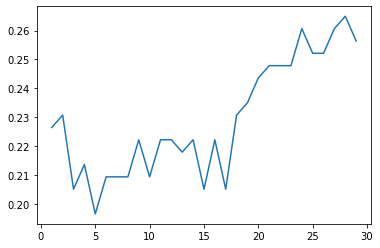

In [103]:
plt.plot(range(1,30),test_error_rate)

In [104]:
#from here pt 5 seems to be k for min error

In [116]:
# applying knn based on suggested k value '5'

knn= KNeighborsClassifier(n_neighbors=5)
knn
kmod= knn.fit(x_train, y_train)
kmod

KNeighborsClassifier()

In [117]:
# printing accuracy  For different values of k acc. was fluctuating betwn 79,80
train_accu= kmod.score(x_train,y_train)
train_accu

0.8565400843881856

In [118]:
y_pred21 =kmod.predict(x_test)
y_pred21
print(pd.crosstab(y_test, y_pred21,margins= True))

# confusion matrix for knn model

col_0       0   1  All
Survived              
0         140  10  150
1          36  48   84
All       176  58  234


In [120]:
print(classification_report(y_test, y_pred21))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       150
           1       0.83      0.57      0.68        84

    accuracy                           0.80       234
   macro avg       0.81      0.75      0.77       234
weighted avg       0.81      0.80      0.79       234



In [122]:
# accuracy for knn test set
print(accuracy_score(y_test,y_pred21))

0.8034188034188035


#### No. of neighbours using cross validation (gridsearchCV) 

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
# making base model
knncv= KNeighborsClassifier()

In [112]:
kparams_grid = {'n_neighbors': [3,5,7,9,11,13,15,17]}

In [113]:
gridmodel= GridSearchCV(knncv, kparams_grid)

In [114]:
gridmodel.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]})

In [124]:
gridmodel.best_params_

# getting same n neighbours (5) as we got by elbow method 

{'n_neighbors': 5}

### ROC Curve

In [61]:
preds1 = kmod.predict_proba(x_test)[:,1]
print(preds1.shape)

(234,)


In [442]:
from sklearn.metrics import roc_curve, auc

In [443]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,preds1 )

In [444]:
#df1 = pd.DataFrame(dict(fpr = fpr1, tpr = tpr1))

In [446]:
auc = metrics.auc(fpr1, tpr1)

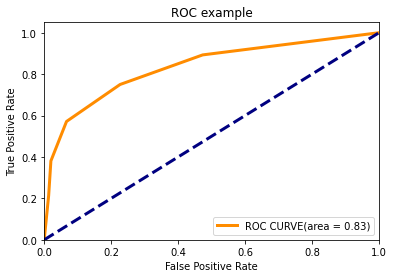

In [447]:
plt.figure()
lw =3 # linewidth
plt.plot(fpr1, tpr1, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.2f)' % auc)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC example')
plt.legend(loc = 'lower right')
plt.show()


In [31]:
#### Applying Decision Tree algorithm

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier()

In [32]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
defaultpred = model.predict(x_test)
defaultpred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [34]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [35]:
print(classification_report(y_test,defaultpred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       150
           1       0.83      0.60      0.69        84

    accuracy                           0.81       234
   macro avg       0.82      0.76      0.78       234
weighted avg       0.81      0.81      0.80       234



In [36]:
print(accuracy_score(y_test,defaultpred))

0.811965811965812


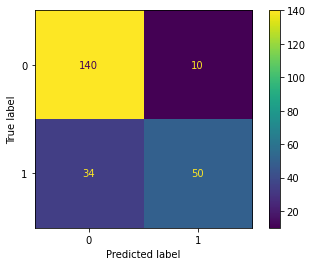

In [37]:
plot_confusion_matrix(model,x_test, y_test)

In [38]:
model.feature_importances_         

array([0.11155134, 0.28999874, 0.24850848, 0.02982079, 0.02279892,
       0.25660093, 0.0407208 ])

In [39]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.250,0
2,1,3,0,26.0,0,0,7.925,0
3,1,1,0,35.0,1,0,53.100,0


In [41]:
from sklearn.tree import plot_tree

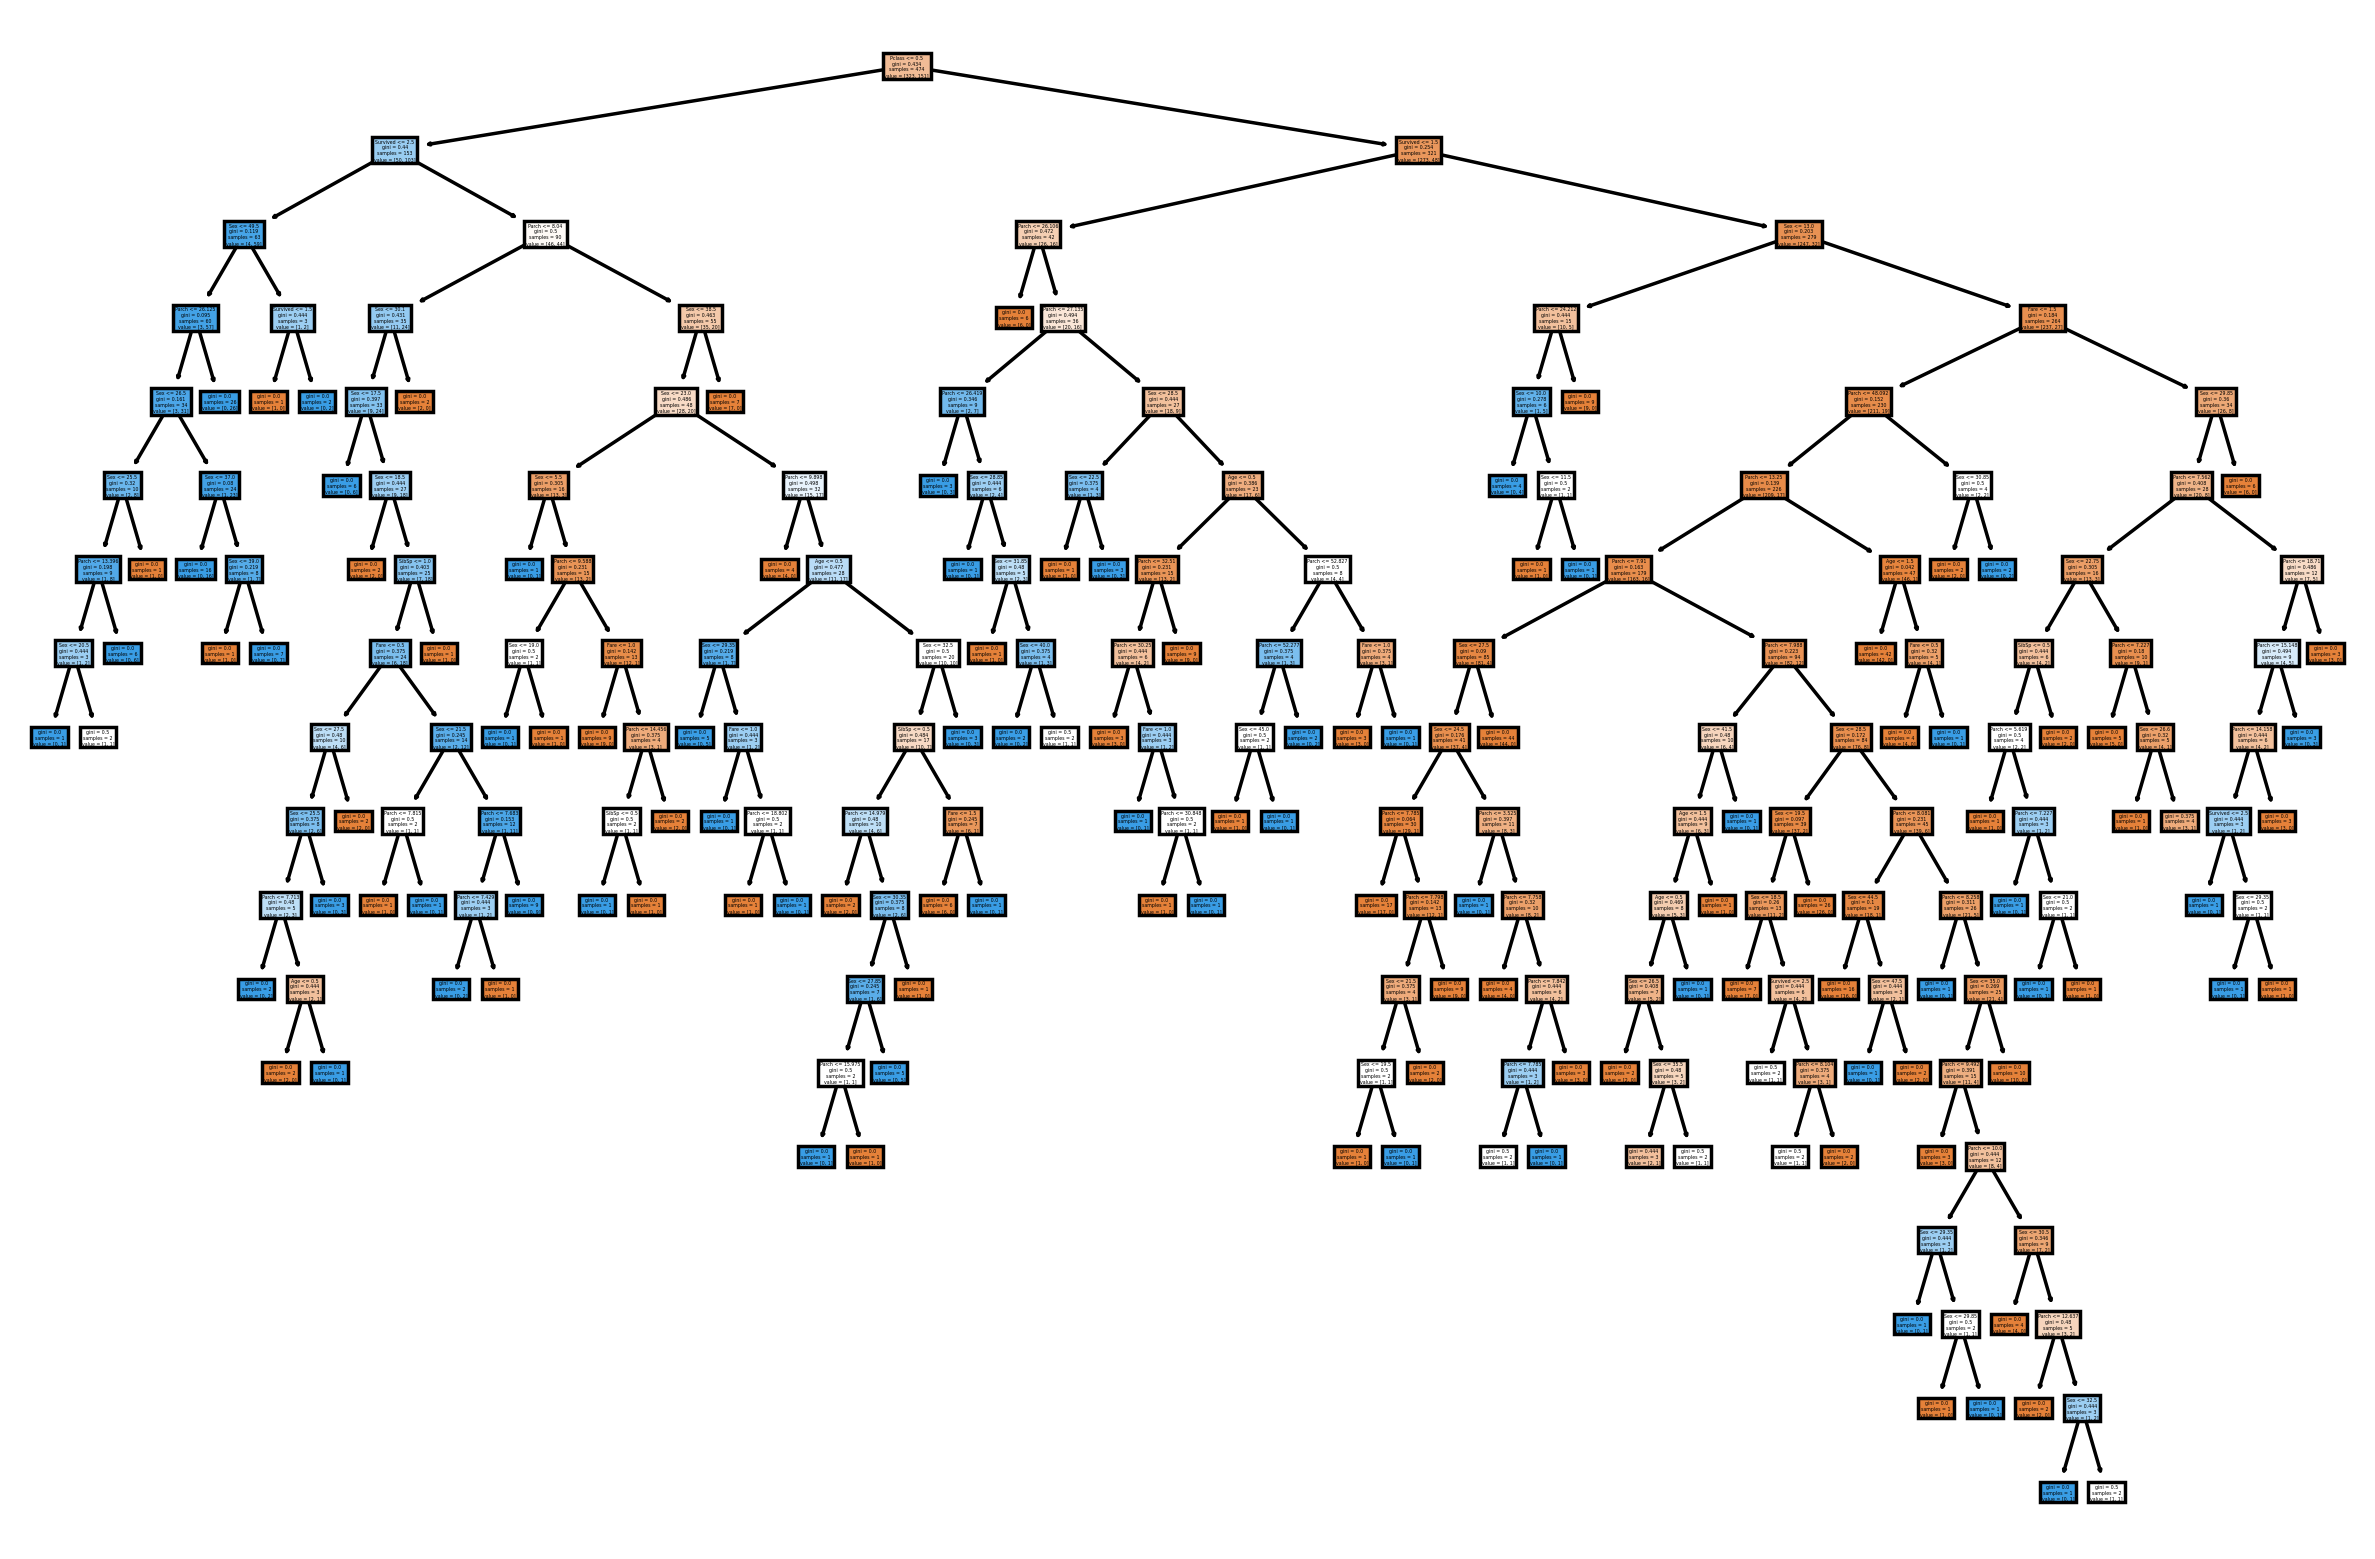

In [44]:
plt.figure(figsize=(12,8),dpi= 250)
plot_tree(model,feature_names= df.columns, filled= True);

In [61]:
prunedtree = DecisionTreeClassifier(max_depth= 2) # no. of levels leaving root node

In [62]:
prunedtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [63]:
y_pred2 = prunedtree.predict(x_test)

In [64]:
print(classification_report(y_pred2, y_test))   # accuracy same as default no of depths

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       202
           1       0.36      0.94      0.52        32

    accuracy                           0.76       234
   macro avg       0.67      0.84      0.68       234
weighted avg       0.90      0.76      0.80       234



In [ ]:

plt.figure(figsize= (12,8),dpi= 200)
plot_tree(prunedtree,filled= True, feature_names= x_train.columns);

#### Hyperparameter tuning using cross validation (gridsearchCV)

In [65]:
# creating base model 

crosstree = DecisionTreeClassifier()

In [81]:
params_tree= {'criterion': ['entropy','gini'], 'max_depth': [3,4,5,6,7,8], 'max_leaf_nodes':[4,5,6,7,8] }

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
gridtree= GridSearchCV(crosstree, params_tree)

In [84]:
gridtree.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [4, 5, 6, 7, 8]})

In [85]:
gridtree.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 6}

In [90]:
# fitting model
crossmodel = DecisionTreeClassifier(criterion='entropy', max_depth= 3, max_leaf_nodes = 6)

In [91]:
crossmodel.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=6)

In [92]:
ypred3= crossmodel.predict(x_test)

In [93]:
print(classification_report(y_test,ypred3))

# using grid seaarch accuracy increased from 76 to 79

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       150
           1       0.75      0.62      0.68        84

    accuracy                           0.79       234
   macro avg       0.78      0.75      0.76       234
weighted avg       0.79      0.79      0.79       234



### Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rfmodel = RandomForestClassifier(max_features= 'auto', random_state= 101)   # default n_estimators = 100

In [127]:
rfmodel.fit(x_train,y_train)

RandomForestClassifier(random_state=101)

In [128]:
y_predrf= rfmodel.predict(x_test)

In [129]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix,confusion_matrix

In [130]:
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       150
           1       0.85      0.56      0.68        84

    accuracy                           0.81       234
   macro avg       0.82      0.75      0.77       234
weighted avg       0.82      0.81      0.80       234



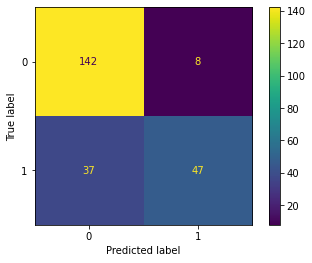

In [131]:
plot_confusion_matrix(rfmodel,x_test,y_test)

In [132]:
rfmodel.feature_importances_

array([0.07834624, 0.25351615, 0.26566033, 0.04557559, 0.04379494,
       0.26893861, 0.04416814])

In [133]:
# Performing Gridsearch

rfcv= RandomForestClassifier()  

In [ ]:
bootstrap= [True,False]
oob_score:[True,False]}

In [162]:
params_grid = {'n_estimators': [64,128,148,160,182,200], 'max_features': [3,4,5,6,7], 'bootstrap': [True,False],'oob_score':[True,False]}

In [163]:
rfgrid = GridSearchCV(rfcv,params_grid)

In [164]:
rfgrid.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.7912206  0.79332587 0.7912654  0.80391937 0.79968645 0.79758119
 0.80176932 0.79547592 0.79547592 0.79758119 0.79966405 0.79332587
 0.79755879 0.7912654  0.79334826 0.79119821 0.78492721 0.79968645
 0.79337066 0.79760358 0.80604703 0.79968645 0.80600224 0.79973124
 0.79968645 0.79966405 0.80394177 0.79547592 0.79547592 0.79334826
 0.80176932 0.79966405 0.79970885 0.80389698 0.80389698 0.79753639
 0.80394177 0.78705487 0.80176932 0.79337066 0.79758119 0.79760358
 0.80389698 0.79341545 0.79549832 0.79545353 0.80181411 0.78913774
 0.78707727 0.79337066 0.78911534 0.7912654  0.79762598 0.78918253
 0.79339306 0.8018589  0.79545353 0.7912654  0.78918253 0.79758119
        nan 0.76600224        nan 0.77229563        nan 0.77231803
        nan 0.78076148        nan 0.77863382        nan 0.77652856
        nan 0.77231803        nan 0.77231803        nan 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [3, 4, 5, 6, 7],
                         'n_estimators': [64, 128, 148, 160, 182, 200],
                         'oob_score': [True, False]})

In [165]:
rfgrid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 182, 'oob_score': True}

In [206]:
# now fittng model on bestparams

rfcv1= RandomForestClassifier(bootstrap= True, max_features= 4, n_estimators= 148, oob_score= True)

In [207]:
rfcv1.fit(x_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=148, oob_score=True)

In [208]:
y_predrcv= rfcv1.predict(x_test)

In [209]:
print(classification_report(y_test,y_predrcv))
# accuracy is almost same but precision has incresed 79-> 80

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       150
           1       0.86      0.57      0.69        84

    accuracy                           0.81       234
   macro avg       0.83      0.76      0.78       234
weighted avg       0.82      0.81      0.80       234



In [172]:
rfcv1.oob_score_   # 21% oob

0.7974683544303798

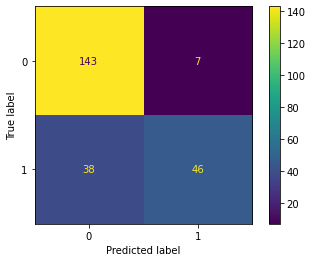

In [173]:
plot_confusion_matrix(rfcv1,x_test,y_test)

In [178]:
# finding exact no. of estimators

errors= []
misclassifications= []

for n in range(150,500):
    
    rfc= RandomForestClassifier(n_estimators= n, max_features=4)
    rfc.fit(x_train, y_train)
    pred= rfc.predict(x_test)
    err= 1- accuracy_score(y_test,pred)
    n_missed= np.sum(pred != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

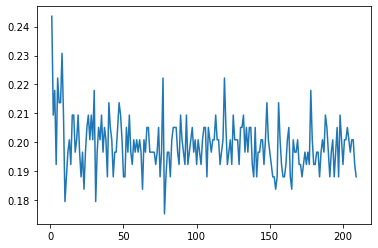

In [176]:
plt.plot(range(1,210),errors)

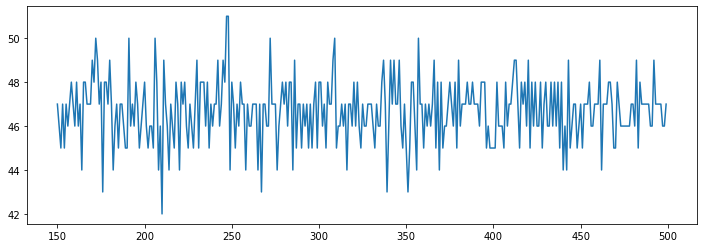

In [210]:
plt.figure(figsize=(12,4))
plt.plot(range(150,500),misclassifications)


In [211]:
from sklearn.model_selection import KFold, cross_val_score


In [ ]:
KFold(n_splits=5, shuffle=True, random_state=42)

#### AdaBoost

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
ad_model = AdaBoostClassifier(n_estimators=50)

In [32]:
ad_model.fit(x_train,y_train)

AdaBoostClassifier()

In [34]:
ad_pred = ad_model.predict(x_test)

In [35]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [37]:
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       150
           1       0.75      0.62      0.68        84

    accuracy                           0.79       234
   macro avg       0.78      0.75      0.76       234
weighted avg       0.79      0.79      0.79       234



In [ ]:
# finding exact no. of estimators

errors= []
misclassifications= []

for n in range(100):
    
    adamodel = AdaBoostClassifier(n_estimators= n)
    adamodel.fit(x_train, y_train)
    pred= adamodel.predict(x_test)
    err= 1- accuracy_score(y_test,pred)
    n_missed= np.sum(pred != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)